<a href="https://colab.research.google.com/github/stepsbtw/Algoritmos/blob/main/algorithms_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Leitura e Filtragem inicial dos dados
Carregue os dados em sua linguagem de programação preferida (por exemplo, Python com pandas).

In [174]:
import pandas as pd
import requests
from io import BytesIO

r = requests.get("https://data.brasil.io/dataset/covid19/caso.csv.gz")
caso = pd.read_csv(BytesIO(r.content), compression="gzip")

r = requests.get("https://data.brasil.io/dataset/covid19/caso_full.csv.gz")
caso_full = pd.read_csv(BytesIO(r.content), compression="gzip")

In [175]:
caso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838003 entries, 0 to 2838002
Data columns (total 13 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   date                            object 
 1   state                           object 
 2   city                            object 
 3   place_type                      object 
 4   confirmed                       int64  
 5   deaths                          int64  
 6   order_for_place                 int64  
 7   is_last                         bool   
 8   estimated_population_2019       float64
 9   estimated_population            float64
 10  city_ibge_code                  float64
 11  confirmed_per_100k_inhabitants  float64
 12  death_rate                      float64
dtypes: bool(1), float64(5), int64(3), object(4)
memory usage: 262.5+ MB


In [176]:
caso_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853648 entries, 0 to 3853647
Data columns (total 18 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   date                                           object 
 3   epidemiological_week                           int64  
 4   estimated_population                           float64
 5   estimated_population_2019                      float64
 6   is_last                                        bool   
 7   is_repeated                                    bool   
 8   last_available_confirmed                       int64  
 9   last_available_confirmed_per_100k_inhabitants  float64
 10  last_available_date                            object 
 11  last_available_death_rate                      float64
 12  last_available_deaths                     

Descrição das colunas:

- **city: nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).**
- city_ibge_code: código IBGE do local.
- **date: data de coleta dos dados no formato YYYY-MM-DD.**
- epidemiological_week: número da semana epidemiológica no formato YYYYWW.
- estimated_population: população estimada para esse município/estado em 2020, segundo o IBGE. (acesse o script que faz o download e conversão dos dados de população).
- estimated_population_2019: população estimada para esse município/estado em 2019, segundo o IBGE. ATENÇÃO: essa coluna possui valores desatualizados, prefira usar a coluna estimated_population.
- is_last: campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).
- is_repeated: campo pré-computado que diz se as informações nesse registro foram publicadas pela Secretaria Estadual de Saúde no dia date ou se o dado é repetido do último dia em que o dado está disponível (igual ou anterior a date). Isso ocorre pois nem todas as secretarias publicam boletins todos os dias. Veja também o campo last_available_date.
- **last_available_confirmed: número de casos confirmados do último dia disponível igual ou anterior à data date.**
- **last_available_confirmed_per_100k_inhabitants: número de casos confirmados por 100.000 habitantes (baseado em estimated_population) do último dia disponível igual ou anterior à data date.**
- last_available_date: data da qual o dado se refere.
- **last_available_death_rate: taxa de mortalidade (mortes / confirmados) do último dia disponível igual ou anterior à data date.**
- **last_available_deaths: número de mortes do último dia disponível igual ou anterior à data date.**
- order_for_place: número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.
- place_type: tipo de local que esse registro descreve, pode ser city ou state.
- **state: sigla da unidade federativa, exemplo: SP.**
- new_confirmed: número de novos casos confirmados desde o último dia (note que caso is_repeated seja True, esse valor sempre será 0 e que esse valor pode ser negativo caso a SES remaneje os casos desse município para outro).
- new_deaths: número de novos óbitos desde o último dia (note que caso is_repeated seja True, esse valor sempre será 0 e que esse valor pode ser negativo caso a SES remaneje os casos desse município para outro).

Recomendadas para análise:
- city
- state
- last_avaible_confirmed
- last_available_deaths
- estimated_population
- last_available_confirmed_per_100k_inhabitants
- last_available_death_rate
- date

Para análises estatísticas mais simples:

In [177]:
# Uma linha por município
df = caso[(caso["is_last"]==True) & (caso["place_type"]=="city")]

Para análise de desempenho de algoritmos com volumes maiores de dados (várias datas por município):

In [178]:
# Séries temporais completas.
df_full = caso_full[(caso_full["place_type"]=="city") & (caso_full["is_repeated"]==False)]

Checar e tratar (remover linhas) colunas com valores nulos.

In [179]:
df.count()

,0
date,5589
state,5589
city,5589
place_type,5589
confirmed,5589
deaths,5589
order_for_place,5589
is_last,5589
estimated_population_2019,5570
estimated_population,5570


In [180]:
df_clean = df.dropna(subset=["confirmed_per_100k_inhabitants", "estimated_population"])
df_full.count()

,0
city,2818241
city_ibge_code,2807856
date,2818241
epidemiological_week,2818241
estimated_population,2807856
estimated_population_2019,2807856
is_last,2818241
is_repeated,2818241
last_available_confirmed,2818241
last_available_confirmed_per_100k_inhabitants,2793772


In [181]:
df_full_clean = df_full.dropna(subset=["last_available_confirmed_per_100k_inhabitants"])
df_full_clean

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0000,0,1,city,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0000,0,2,city,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0000,0,3,city,AC,1,0
6,Rio Branco,1200401.0,2020-03-20,202012,413418.0,407319.0,False,False,7,1.69320,2020-03-20,0.0000,0,4,city,AC,3,0
8,Rio Branco,1200401.0,2020-03-21,202012,413418.0,407319.0,False,False,11,2.66075,2020-03-21,0.0000,0,5,city,AC,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838382,Tocantínia,1721109.0,2021-12-08,202149,7617.0,7545.0,True,False,1013,13299.19916,2021-12-08,0.0128,13,569,city,TO,13,0
3838383,Tupirama,1721257.0,2021-12-08,202149,1922.0,1891.0,True,False,223,11602.49740,2021-12-08,0.0090,2,565,city,TO,0,0
3838384,Tupiratins,1721307.0,2021-12-08,202149,2729.0,2671.0,True,False,199,7292.04837,2021-12-08,0.0151,3,565,city,TO,0,0
3838385,Wanderlândia,1722081.0,2021-12-08,202149,11734.0,11683.0,True,False,1433,12212.37430,2021-12-08,0.0147,21,590,city,TO,0,0


# 2) Cálculo de Métricas
Para cada município:
- Taxa de casos por 100 mil habitantes:
  - casos/habitantes * 100 000
- Taxa de óbitos por 100 mil habitantes:
  - obitos/habitantes * 100 000
- Taxa de mortalidade:
  - obitos/casos

In [182]:
# Atenção! Existem muitos municípios com o mesmo nome em estados diferentes:
counts = df_clean["city"].value_counts()
counts[counts>1]

,count
city,
São Domingos,5
Bom Jesus,5
Planalto,4
São Francisco,4
Vera Cruz,4
...,...
Petrolândia,2
Tabatinga,2
São Carlos,2


Portanto vamos usar o indentificador único do ibge.

In [183]:
df_resposta = df_clean[["city", "state", "city_ibge_code"]].copy()

df_resposta["taxa_casos_100k"] = df_clean["confirmed"] / df_clean["estimated_population"] * 10**5
df_resposta["taxa_obitos_100k"] = df_clean["deaths"] / df_clean["estimated_population"] * 10**5
df_resposta["taxa_mortalidade"] = df_clean["deaths"] / df_clean["confirmed"]

df_resposta

,city,state,city_ibge_code,taxa_casos_100k,taxa_obitos_100k,taxa_mortalidade
734,Amapá,AP,1600105.0,15500.163274,141.504300,0.009129
1320,Calçoene,AP,1600204.0,16380.682823,123.828056,0.007559
1901,Cutias,AP,1600212.0,14325.520406,114.735289,0.008009
2478,Ferreira Gomes,AP,1600238.0,19656.081336,87.862433,0.004470
3058,Itaubal,AP,1600253.0,9791.703756,53.409293,0.005455
...,...,...,...,...,...,...
2835558,Águas de São Pedro,SP,3500600.0,13092.871343,340.812269,0.026030
2836080,Álvares Florence,SP,3501202.0,17164.792981,438.716753,0.025559
2836553,Álvares Machado,SP,3501301.0,10028.802304,316.025282,0.031512
2837057,Álvaro de Carvalho,SP,3501400.0,5536.594615,170.648464,0.030822


# 3) Ordenação:
Implemente os algoritmos de ordenação abaixo e aplique-os para classificar os municípios por:
- Maior taxa de casos por 100 mil hab.
- Maior taxa de mortalidade.
- Menor taxa de mortalidade.

Compare:
- Merge Sort
- Quick Sort
- Função nativa da linguagem (ex: sort() do Python)

Mergesort (TopDown):

In [184]:
def merge(vL, vR, compare=lambda x,y : x<y): # auxiliary O(n) space
  out = []
  i = j = 0
  # inserting
  while i < len(vL) and j < len(vR):
    if compare(vL[i], vR[j]): # rev
      out.append(vL[i])
      i += 1
    else:
      out.append(vR[j])
      j += 1
  # extending
  while i < len(vL):
    out.append(vL[i])
    i += 1
  while j < len(vR):
    out.append(vR[j])
    j += 1

  return out

def mergesort(v, l=0, r=None, compare=lambda x,y : x<y):
  if r == None:
    r = len(v)-1
  # base case
  if l == r:
    return [v[l]]
  # divide T(n//2)
  m = (l+r)//2
  vL = mergesort(v, l, m, compare)
  vR = mergesort(v, m+1, r, compare)
  # conquer O(n)
  return merge(vL, vR, compare)

Quicksort:

In [185]:
import random

def partition(v, l, r, compare=lambda x,y : x<y):
  pidx = random.randint(l, r)
  v[pidx], v[r] = v[r], v[pidx]  # move o pivô para o fim
  pivo = v[r]
  i = l
  for j in range(l,r):
    if compare(v[j], pivo):
      v[i], v[j] = v[j], v[i]
      i+=1
  v[i], v[r] = v[r], v[i]
  return i

def quicksort(v, l=0, r=None, compare=lambda x,y : x<y):  # inplace
  if r == None:
    r = len(v)-1
  if l < r:
    # divide (random)
    pidx = partition(v, l, r, compare)
    # conquer
    quicksort(v, l, pidx-1, compare)
    quicksort(v, pidx+1, r, compare)

## Sobre os algoritmos iterativos:
Como o DataFrame é bem grande, eu utilizarei a forma ITERATIVA dos algoritmos para evitar estouro da pilha de recursão.

In [186]:
def merge(v, l1, r1, l2, r2, compare=lambda x,y : x<y):
  out = []
  i, j = l1, l2

  while i <= r1 and j <= r2:
    if compare(v[i], v[j]):
      out.append(v[i])
      i += 1
    else:
      out.append(v[j])
      j += 1

  while i <= r1:
    out.append(v[i])
    i += 1
  while j <= r2:
    out.append(v[j])
    j += 1

  for k in range(len(out)):
        v[l1 + k] = out[k]

def mergesort(v, l=0, r=None, compare=lambda x,y : x<y): # topdown iterative
  if r == None:
    r = len(v)-1
  n = len(v)
  if n <= 1:
    return v
  stack = [(0, n-1, False)]
  while stack:
    l, r, divided = stack.pop()
    if l < r:
      m = (l + r) // 2
      if not divided:
        # dividir
        stack.append((l, r, True)) # marcar como dividido
        stack.append((m+1, r, 0)) # direita
        stack.append((l, m, 0)) # esquerda
      else:
        merge(v, l, m, m+1, r, compare)

def quicksort(v, l=0, r=None, compare=lambda x,y : x<y):
  if r == None:
    r = len(v)-1
  stack = [(l,r)]
  while stack:
    l,r = stack.pop()
    if l < r:
      pidx = partition(v, l, r, compare)
      stack.append((l,pidx-1))
      stack.append((pidx+1,r))

## Sobre ordenar o DataFrame:
Para ordenar apartir das colunas, preciso salvar um array com os índices ordenados.

Estou usando o DataFrame mais simples usado para análise estatística.

In [187]:
idx = list(range(len(df_clean)))

Ordenando por Taxa de Casos por 100k habitantes de forma DECRESCENTE.

In [188]:
idx_m, idx_q, idx_s = idx.copy(), idx.copy(), idx.copy()

data = list(df_clean["confirmed_per_100k_inhabitants"])

mergesort(idx_m, compare=(lambda i,j: data[i] >= data[j]))
quicksort(idx_q, compare=(lambda i,j: data[i] >= data[j]))
idx_s.sort(key=lambda i: data[i], reverse=True)

# comparison of stability
print(idx_m == idx_q)
print(idx_q == idx_s)
print(idx_m == idx_s)

df_sorted_confirmed_per_100k = df_clean.iloc[idx_s]
df_sorted_confirmed_per_100k

False
False
True


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1657808,2022-03-14,RN,Severiano Melo,city,1084,15,465,True,2440.0,2088.0,2413607.0,51915.70881,0.0138
700844,2021-11-28,GO,Porteirão,city,2000,22,516,True,3881.0,3931.0,5218052.0,50877.63928,0.0110
42116,2021-12-18,AM,Japurá,city,1051,11,586,True,2755.0,2251.0,1302108.0,46690.35984,0.0105
2432006,2022-03-24,RS,Santa Cecília do Sul,city,720,4,601,True,1639.0,1634.0,4316733.0,44063.64749,0.0056
849622,2022-03-10,PA,Jacareacanga,city,3319,40,569,True,8239.0,7590.0,1503754.0,43728.59025,0.0121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
567794,2021-09-16,MA,Primeira Cruz,city,82,3,467,True,15315.0,15431.0,2109403.0,531.39784,0.0366
518949,2021-09-16,MA,Central do Maranhão,city,44,3,469,True,8673.0,8740.0,2103125.0,503.43249,0.0682
560119,2021-09-16,MA,Pedro do Rosário,city,113,8,476,True,25144.0,25354.0,2108256.0,445.68904,0.0708
1464731,2021-09-22,MG,Miravânia,city,10,2,317,True,4888.0,4914.0,3142254.0,203.50020,0.2000


## Sobre Estabilidade da Ordenação:

- O Quicksort é um algoritmo de ordenação INSTÁVEL, altera a ordenação de elementos iguais, já o Timsort (python nativo) e o Mergesort são estáveis.

- O Quicksort também é INPLACE, altera o array original sem precisar de um espaço auxiliar. Já o Mergesort e o Timsort (python nativo) utilizam um espaço O(n) auxiliar.

Ordenando a apartir da Taxa de Mortalidade de forma CRESCENTE.

In [189]:
idx_m, idx_q, idx_s = idx.copy(), idx.copy(), idx.copy()

data = list(df_clean["death_rate"])

mergesort(idx_m, compare=(lambda i,j: data[i] >= data[j]))
quicksort(idx_q, compare=(lambda i,j: data[i] >= data[j]))
idx_s.sort(key=lambda i: data[i], reverse=True)

# comparison of stability
print(idx_m == idx_q)
print(idx_q == idx_s)
print(idx_m == idx_s)

df_sorted_death_rate = df_clean.iloc[idx_s]
df_sorted_death_rate

False
False
True


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
509317,2021-09-16,MA,Boa Vista do Gurupi,city,15,4,474,True,9287.0,8382.0,2101970.0,178.95490,0.2667
1464731,2021-09-22,MG,Miravânia,city,10,2,317,True,4888.0,4914.0,3142254.0,203.50020,0.2000
1857152,2021-10-26,PR,Prado Ferreira,city,106,18,543,True,3753.0,3780.0,4120333.0,2804.23280,0.1698
559120,2021-09-16,MA,Paço do Lumiar,city,1415,228,509,True,122197.0,123747.0,2107506.0,1143.46206,0.1611
971292,2021-10-22,PE,Ribeirão,city,501,80,540,True,47415.0,47616.0,2611804.0,1052.16734,0.1597
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065568,2022-02-17,SC,Novo Horizonte,city,546,0,546,True,2442.0,2404.0,4211652.0,22712.14642,0.0000
2165010,2021-12-08,TO,Crixás do Tocantins,city,183,0,498,True,1722.0,1735.0,1706258.0,10547.55043,0.0000
2177649,2021-12-08,TO,Lavandeira,city,180,0,495,True,1923.0,1954.0,1712157.0,9211.87308,0.0000
2209369,2021-12-08,TO,Taipas do Tocantins,city,205,0,495,True,2148.0,2166.0,1720937.0,9464.45060,0.0000


De forma DECRESCENTE:

In [190]:
idx_m, idx_q, idx_s = idx.copy(), idx.copy(), idx.copy()

data = list(df_clean["death_rate"])

mergesort(idx_m, compare=(lambda i,j: data[i] <= data[j]))
quicksort(idx_q, compare=(lambda i,j: data[i] <= data[j]))
idx_s.sort(key=lambda i: data[i])

# comparison of stability
print(idx_m == idx_q)
print(idx_q == idx_s)
print(idx_m == idx_s)

df_sorted_death_rate_dec = df_clean.iloc[idx_s]
df_sorted_death_rate_dec

False
False
True


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
549576,2021-09-16,MA,Milagres do Maranhão,city,239,0,492,True,8464.0,8483.0,2106672.0,2817.39950,0.0000
570671,2021-09-16,MA,Santa Filomena do Maranhão,city,50,0,468,True,7773.0,7826.0,2109759.0,638.89599,0.0000
580712,2021-09-16,MA,São Francisco do Brejão,city,542,0,488,True,11798.0,11941.0,2110856.0,4538.98333,0.0000
652218,2021-11-28,GO,Guarani de Goiás,city,442,0,518,True,3893.0,3846.0,5209408.0,11492.45970,0.0000
721342,2021-11-28,GO,Sítio d'Abadia,city,61,0,428,True,2989.0,3001.0,5220702.0,2032.65578,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
971292,2021-10-22,PE,Ribeirão,city,501,80,540,True,47415.0,47616.0,2611804.0,1052.16734,0.1597
559120,2021-09-16,MA,Paço do Lumiar,city,1415,228,509,True,122197.0,123747.0,2107506.0,1143.46206,0.1611
1857152,2021-10-26,PR,Prado Ferreira,city,106,18,543,True,3753.0,3780.0,4120333.0,2804.23280,0.1698
1464731,2021-09-22,MG,Miravânia,city,10,2,317,True,4888.0,4914.0,3142254.0,203.50020,0.2000


## Anotações:

- Em complexidade de tempo, o Mergesort é O(nlogn) em todos os casos.

- O Quicksort depende de particionar a lista em sublistas, um algoritmo aleatório. Seu melhor caso é quando os pivôs escolhidos dividem a lista no meio sucessivamente, sendo O(n x logn). No pior caso, onde a lista diminui em apenas 1 elemento, é O(n x n). É provado que em média o Quicksort é O(n x logn).

- O Timsort é um método hibrido em que utiliza Mergesort e aproveita o Insertion sort para sublistas pequenas. O(nlogn) no pior e caso médio, O(n) no melhor (caso já esteja ordenado).

# 4) Busca da Mediana - Quickselect

- A mediana das taxas de mortalidade entre os municípios.
- A mediana das taxas de casos por 100 mil habitantes.

Compare o desempenho do Quickselect com a abordagem tradicional
de ordenar e acessar o elemento central.

In [191]:
def median_mergesort(v):
  mergesort(v)
  n = len(v)
  if n%2 == 1:
    return v[n//2]
  else:
    return (v[n//2] + v[n//2 -1])/2

def median(v):
  v = sorted(v)
  n = len(v)
  if n%2 == 1:
    return v[n//2]
  else:
    return (v[n//2] + v[n//2 -1])/2

def quickmedian(v):
  n = len(v)
  if n%2 == 1:
    return quickselect(v, 0, n-1, n//2)
  else:
    return 0.5*(quickselect(v, 0, n-1, n//2 -1) + quickselect(v, 0, n-1, n//2))

def quickselect(v, l, r, k):
  p = partition(v,l,r)
  if p == k:
    return v[p]
  elif p < k:
    return quickselect(v, p+1, r, k)
  else:
    return quickselect(v, l, p-1, k)

Implementação Iterativa:

In [192]:
def quickselect(v, l, r, k):
    while l <= r:
        p = partition(v, l, r)
        if p == k:
            return v[p]
        elif p < k:
            l = p + 1
        else:
            r = p - 1

Comparando as performances de encontrar a mediana:

In [193]:
v = list(df_clean["confirmed_per_100k_inhabitants"])

start = time.time()
x = median(v.copy())
end = time.time()
print(f"Median: {end-start} - {x}")

start = time.time()
x = median_mergesort(v.copy())
end = time.time()
print(f"Median com Mergesort: {end-start} - {x}")

start = time.time()
median_confirmed_per_100k = quickmedian(v.copy())
end = time.time()
print(f"Quickmedian: {end-start} - {median_confirmed_per_100k}\n")

Median: 0.0010373592376708984 - 10347.400314999999
Median com Mergesort: 0.028191804885864258 - 10347.400314999999
Quickmedian: 0.005160331726074219 - 10347.400314999999



In [194]:
v = list(df_clean["death_rate"])

start = time.time()
x = median(v.copy())
end = time.time()
print(f"Median: {end-start} - {x}")

start = time.time()
x = median_mergesort(v.copy())
end = time.time()
print(f"Median com Mergesort: {end-start} - {x}")

start = time.time()
median_death_rate = quickmedian(v.copy())
end = time.time()
print(f"Quickmedian: {end-start} - {median_death_rate}")

Median: 0.0014560222625732422 - 0.0204
Median com Mergesort: 0.024845600128173828 - 0.0204
Quickmedian: 0.005126476287841797 - 0.0204


## Sobre a performance do Quickselect
- Caso a base de dados já esteja ordenada, encontrar a mediana é O(1).

- Utilizar o Mergesort nos proporciona O(nlogn) + O(1).

- Ordenar a lista usando o Sort nativo que altamente otimizado acaba sendo bem melhor.

- Com o Quickselect, a complexidade é basicamente só o partition. No melhor caso (dividindo sempre ao meio) encontra a mediana em O(n), MAS no pior caso (diminuir somente em um a lista) é O(n^2).



# 5) Avaliação de desempenho
- Meça o tempo de execução de cada algoritmo para diferentes tamanho de entrada (e.g., 100, 1000, 10000 linhas).
- Compare os resultados com a complexidade esperada.


## Sobre uma ordenação prévia
O DataFrame FULL original já possui algum tipo de ordenação por data. Há uma ordem entre número de casos, taxa de mortalidade, etc.

Portanto, para ser justo, irei realizar um SHUFFLE antes de comparar os métodos.

In [195]:
df_full = df_full_clean.sample(frac=1)

In [196]:
sample_sizes = [100, 1000, 10000]

Ordenando por casos confirmados por 100k pessoas decrescente.

In [197]:
times_m_casos, times_q_casos, times_s_casos = [], [], [] # salvar os tempos para ordenar cada amostra

for n in sample_sizes:
  idx = list(range(n))
  print(f"\nList Size = {n}")
  sample = df_full.sample(n)
  data = list(sample["last_available_confirmed_per_100k_inhabitants"])

  idx_m, idx_q, idx_s = idx.copy(), idx.copy(), idx.copy()

  # Mergesort
  start = time.time()
  mergesort(idx_m, compare=(lambda i, j: data[i] >= data[j]))
  times_m_casos.append(time.time() - start)
  print(f"Mergesort: {time.time()-start}")

  # Quicksort
  start = time.time()
  quicksort(idx_q, compare=(lambda i, j: data[i] >= data[j]))
  times_q_casos.append(time.time() - start)
  print(f"Quicksort: {time.time()-start}")

  # Timsort (Python sort)
  start = time.time()
  idx_s.sort(key=(lambda i: data[i]), reverse=True)
  times_s_casos.append(time.time() - start)
  print(f"Python Sort: {time.time()-start}\n")


List Size = 100
Mergesort: 0.0005004405975341797
Quicksort: 0.0003399848937988281
Python Sort: 3.361701965332031e-05


List Size = 1000
Mergesort: 0.006638526916503906
Quicksort: 0.00463104248046875
Python Sort: 0.0003173351287841797


List Size = 10000
Mergesort: 0.07442545890808105
Quicksort: 0.06362605094909668
Python Sort: 0.003984212875366211



Ordenando por death_rate crescente.

In [198]:
times_m_death_inc, times_q_death_inc, times_s_death_inc = [], [], []

for n in sample_sizes:
  idx = list(range(n))
  print(f"List Size = {n}")
  sample = df_full.sample(n)
  data = list(sample["last_available_death_rate"])

  idx_m, idx_q, idx_s = idx.copy(), idx.copy(), idx.copy()

  # Mergesort
  start = time.time()
  mergesort(idx_m, compare=(lambda i, j: data[i] >= data[j]))
  times_m_death_inc.append(time.time() - start)
  print(f"Mergesort: {time.time()-start}")

  # Quicksort
  start = time.time()
  quicksort(idx_q, compare=(lambda i, j: data[i] >= data[j]))
  times_q_death_inc.append(time.time() - start)
  print(f"Quicksort: {time.time()-start}")

  # Timsort (Python sort)
  start = time.time()
  idx_s.sort(key=(lambda i: data[i]), reverse=True)
  times_s_death_inc.append(time.time() - start)
  print(f"Python Sort: {time.time()-start}\n")

List Size = 100
Mergesort: 0.0003933906555175781
Quicksort: 0.00036787986755371094
Python Sort: 3.266334533691406e-05

List Size = 1000
Mergesort: 0.008846044540405273
Quicksort: 0.007611989974975586
Python Sort: 0.00031065940856933594

List Size = 10000
Mergesort: 0.07012104988098145
Quicksort: 0.44357919692993164
Python Sort: 0.0047130584716796875



Ordenando por death_rate decrescente.

In [199]:
times_m_death_dec, times_q_death_dec, times_s_death_dec = [], [], []

for n in sample_sizes:
  idx = list(range(n))
  print(f"List Size = {n}")
  sample = df_full.sample(n)
  data = list(sample["last_available_death_rate"])

  idx_m, idx_q, idx_s = idx.copy(), idx.copy(), idx.copy()

  # Mergesort
  start = time.time()
  mergesort(idx_m, compare=(lambda i, j: data[i] <= data[j]))
  times_m_death_dec.append(time.time() - start)
  print(f"Mergesort: {time.time()-start}")

  # Quicksort
  start = time.time()
  quicksort(idx_q, compare=(lambda i, j: data[i] <= data[j]))
  times_q_death_dec.append(time.time() - start)
  print(f"Quicksort: {time.time()-start}")

  # Timsort (Python sort)
  start = time.time()
  idx_s.sort(key=(lambda i: data[i]), reverse=True)
  times_s_death_dec.append(time.time() - start)
  print(f"Python Sort: {time.time()-start}\n")

List Size = 100
Mergesort: 0.00045561790466308594
Quicksort: 0.0003216266632080078
Python Sort: 3.2901763916015625e-05

List Size = 1000
Mergesort: 0.003186464309692383
Quicksort: 0.004651784896850586
Python Sort: 0.000232696533203125

List Size = 10000
Mergesort: 0.037253379821777344
Quicksort: 0.21764469146728516
Python Sort: 0.002765178680419922



# 6) Relatório
- Gráficos de desempenho (tempo vs tamanho).
- Tabelas com os Top 10 municípios segundo cada critério.
- Valor da mediana das taxas encontradas e sua interpretação
- Análise crítica dos resultados (breve)

## Comparando os algoritmos de ordenação:

In [200]:
def plot_benchmark(sample_sizes, times_m, times_q, times_s):
  plt.figure(figsize=(10, 6))
  plt.plot(sample_sizes, times_m, label="Mergesort")
  plt.plot(sample_sizes, times_q, label="Quicksort")
  plt.plot(sample_sizes, times_s, label="Timsort (Python)")
  plt.xlabel("Tamanho da Amostra")
  plt.ylabel("Tempo (s)")
  plt.title("Desempenho dos Algoritmos de Ordenação")
  plt.legend()
  plt.grid(True)
  plt.show()

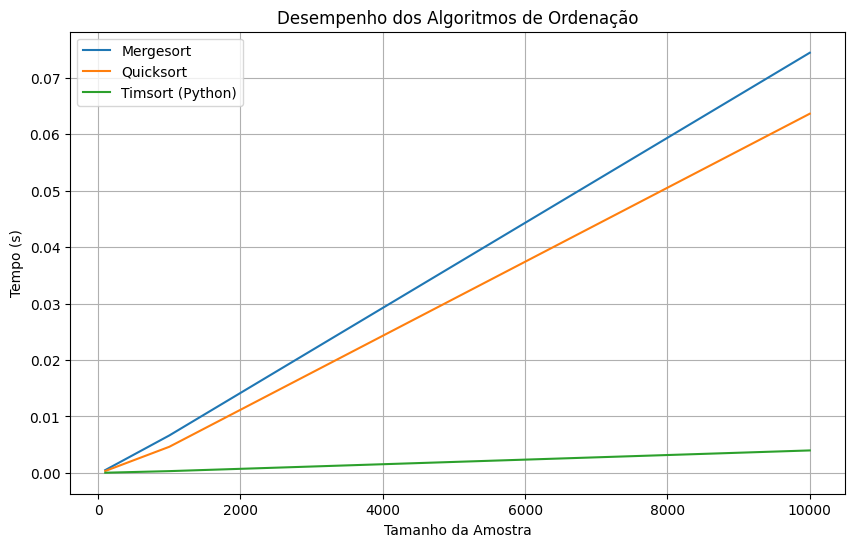

In [201]:
plot_benchmark(sample_sizes, times_m_casos, times_q_casos, times_s_casos)

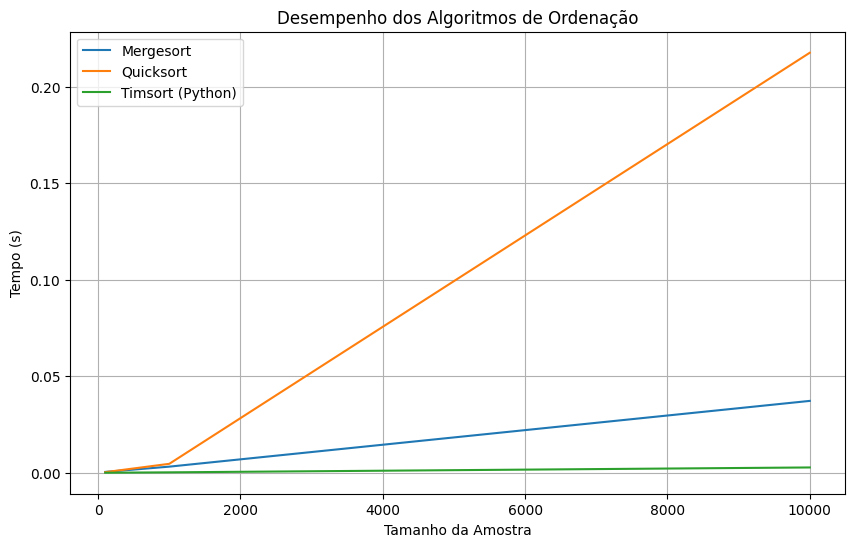

In [202]:
plot_benchmark(sample_sizes, times_m_death_dec, times_q_death_dec, times_s_death_dec)

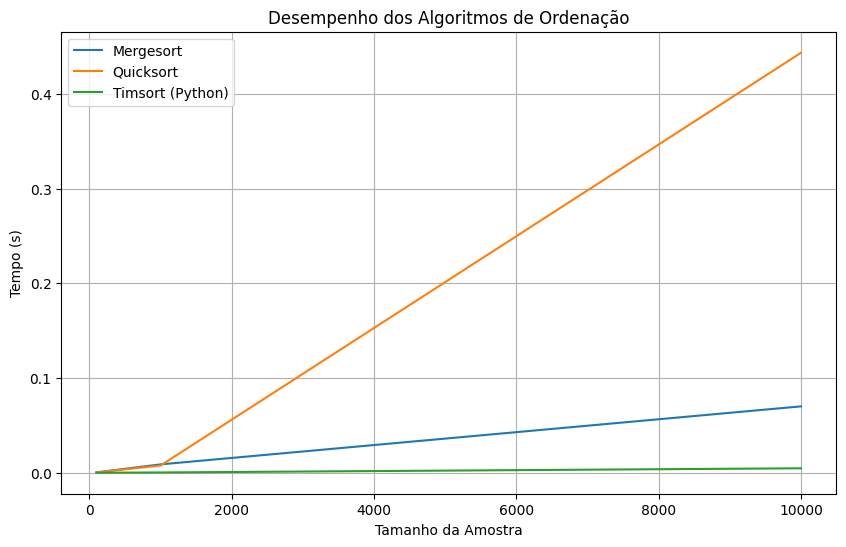

In [203]:
plot_benchmark(sample_sizes, times_m_death_inc, times_q_death_inc, times_s_death_inc)

## Comparando os algoritmos para a mediana:

In [204]:
def plot_median_benchmark(sample_sizes, times_m_m, times_m_p, times_m_q):
  plt.figure(figsize=(10, 6))
  plt.plot(sample_sizes, times_m_m, label="Median with MergeSort")
  plt.plot(sample_sizes, times_m_p, label="Median with PythonSort")
  plt.plot(sample_sizes, times_m_q, label="Median with QuickSelect")
  plt.xlabel("Tamanho da Amostra")
  plt.ylabel("Tempo (s)")
  plt.title("Desempenho dos Algoritmos de Mediana")
  plt.legend()
  plt.grid(True)
  plt.show()

In [205]:
times_median, times_median_merge, times_quickmedian = [],[],[]
for n in sample_sizes:
  print(f"List Size = {n}")
  data = list(df_full["last_available_confirmed_per_100k_inhabitants"].sample(n))

  # Median (Python Sort)
  start = time.time()
  median(data.copy())
  times_median.append(time.time() - start)
  print(f"Median w/ PythonSort: {time.time() - start}")

  # Median (Mergesort)
  start = time.time()
  median_merge(data.copy())
  times_median_merge.append(time.time() - start)
  print(f"Median w/ Mergesort: {time.time() - start}")

  # Median (QuickSelect)
  start = time.time()
  quickmedian(data.copy())
  times_quickmedian.append(time.time() - start)
  print(f"QuickSelect: {time.time() - start}\n")

List Size = 100
Median w/ PythonSort: 3.147125244140625e-05
Median w/ Mergesort: 0.0002377033233642578
QuickSelect: 0.00010538101196289062

List Size = 1000
Median w/ PythonSort: 0.0002529621124267578
Median w/ Mergesort: 0.004088640213012695
QuickSelect: 0.0008845329284667969

List Size = 10000
Median w/ PythonSort: 0.002492666244506836
Median w/ Mergesort: 0.044843196868896484
QuickSelect: 0.009308576583862305



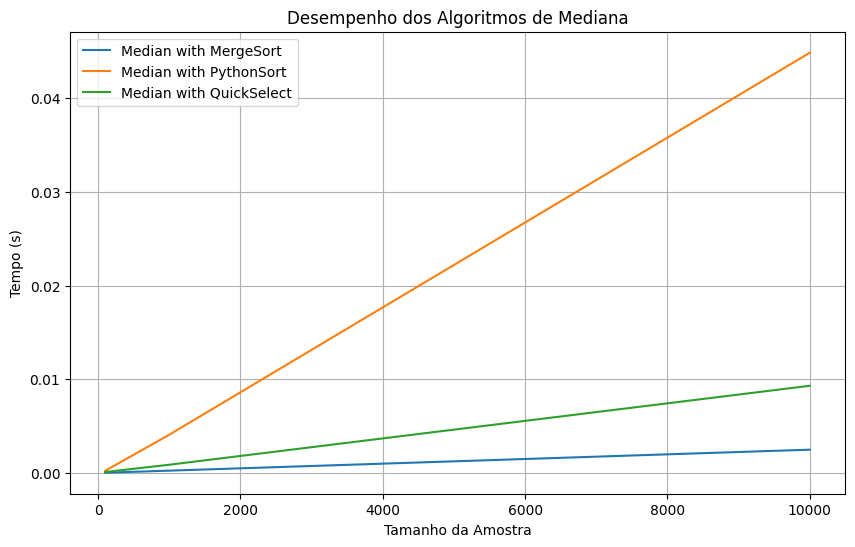

In [206]:
plot_median_benchmark(sample_sizes, times_median, times_median_merge, times_quickmedian)

In [207]:
times_median, times_median_merge, times_quickmedian = [],[],[]
for n in sample_sizes:
  print(f"List Size = {n}")
  data = list(df_full["last_available_death_rate"].sample(n))

  # Median (Python Sort)
  start = time.time()
  median(data.copy())
  times_median.append(time.time() - start)
  print(f"Median w/ PythonSort: {time.time() - start}")

  # Median (Mergesort)
  start = time.time()
  median_merge(data.copy())
  times_median_merge.append(time.time() - start)
  print(f"Median w/ Mergesort: {time.time() - start}")

  # Median (QuickSelect)
  start = time.time()
  quickmedian(data.copy())
  times_quickmedian.append(time.time() - start)
  print(f"QuickSelect: {time.time() - start}\n")

List Size = 100
Median w/ PythonSort: 2.6226043701171875e-05
Median w/ Mergesort: 0.00023317337036132812
QuickSelect: 9.703636169433594e-05

List Size = 1000
Median w/ PythonSort: 0.00016450881958007812
Median w/ Mergesort: 0.0037250518798828125
QuickSelect: 0.0008478164672851562

List Size = 10000
Median w/ PythonSort: 0.0015897750854492188
Median w/ Mergesort: 0.034058332443237305
QuickSelect: 0.006687641143798828



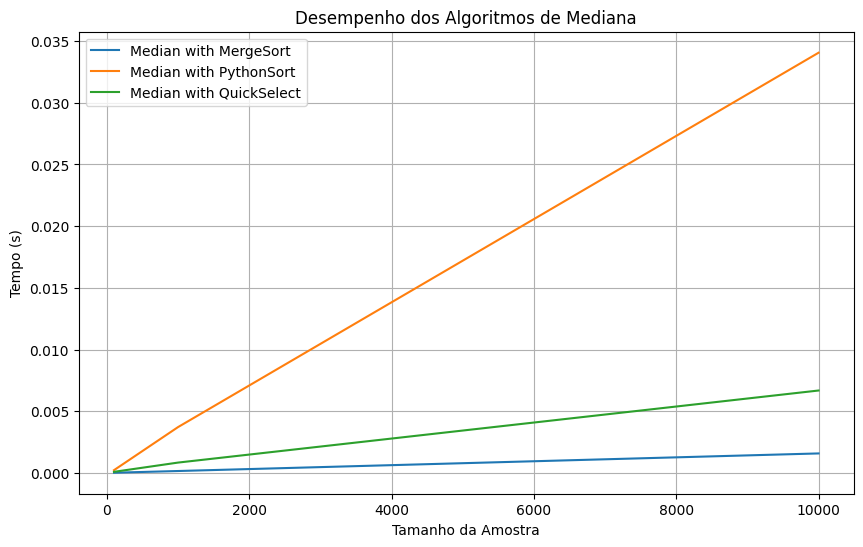

In [208]:
plot_median_benchmark(sample_sizes,times_median, times_median_merge, times_quickmedian)

## Tabelas Top10:

In [209]:
df_sorted_confirmed_per_100k.head(10)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1657808,2022-03-14,RN,Severiano Melo,city,1084,15,465,True,2440.0,2088.0,2413607.0,51915.70881,0.0138
700844,2021-11-28,GO,Porteirão,city,2000,22,516,True,3881.0,3931.0,5218052.0,50877.63928,0.0110
42116,2021-12-18,AM,Japurá,city,1051,11,586,True,2755.0,2251.0,1302108.0,46690.35984,0.0105
2432006,2022-03-24,RS,Santa Cecília do Sul,city,720,4,601,True,1639.0,1634.0,4316733.0,44063.64749,0.0056
849622,2022-03-10,PA,Jacareacanga,city,3319,40,569,True,8239.0,7590.0,1503754.0,43728.59025,0.0121
784097,2022-03-24,MT,Paranaíta,city,4526,38,559,True,11225.0,11244.0,5106299.0,40252.57915,0.0084
1673335,2022-03-14,RN,Viçosa,city,693,4,459,True,1718.0,1725.0,2414902.0,40173.91304,0.0058
1615363,2022-03-14,RN,Frutuoso Gomes,city,1588,10,462,True,4068.0,4041.0,2404002.0,39297.20366,0.0063
2231543,2022-03-24,RS,Barra Funda,city,945,14,579,True,2539.0,2551.0,4301958.0,37044.29635,0.0148
2086078,2022-02-17,SC,Presidente Castello Branco,city,570,4,632,True,1568.0,1547.0,4213906.0,36845.50743,0.0070


In [210]:
df_sorted_death_rate_dec.head(10)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
549576,2021-09-16,MA,Milagres do Maranhão,city,239,0,492,True,8464.0,8483.0,2106672.0,2817.39950,0.0
570671,2021-09-16,MA,Santa Filomena do Maranhão,city,50,0,468,True,7773.0,7826.0,2109759.0,638.89599,0.0
580712,2021-09-16,MA,São Francisco do Brejão,city,542,0,488,True,11798.0,11941.0,2110856.0,4538.98333,0.0
652218,2021-11-28,GO,Guarani de Goiás,city,442,0,518,True,3893.0,3846.0,5209408.0,11492.45970,0.0
721342,2021-11-28,GO,Sítio d'Abadia,city,61,0,428,True,2989.0,3001.0,5220702.0,2032.65578,0.0
1068214,2021-08-22,PB,Riachão do Bacamarte,city,485,0,431,True,4521.0,4541.0,2512754.0,10680.46686,0.0
1310542,2021-09-22,MG,Aricanduva,city,149,0,317,True,5231.0,5269.0,3104452.0,2827.86107,0.0
1324641,2021-09-22,MG,Bonito de Minas,city,110,0,317,True,11230.0,11369.0,3108255.0,967.54332,0.0
1336711,2021-09-22,MG,Campo Azul,city,210,0,317,True,3817.0,3824.0,3111150.0,5491.63180,0.0
1354098,2021-09-22,MG,Cedro do Abaeté,city,38,0,317,True,1164.0,1157.0,3115607.0,3284.35609,0.0


## Valor da Mediana das Taxas:

In [211]:
print(median_confirmed_per_100k, median_death_rate)

10347.400314999999 0.0204
